<a href="https://colab.research.google.com/github/Larissabraz/AtividadesbootcampMIA/blob/main/4%2C_bootcamp_MIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Célula para executar no colab e ter acesso aos arquivos que estão no Google Drive
# Descomente caso isso seja necessário

from google.colab import drive
drive.mount('/content/drive')

# o resultado da celula te dirá em qual pasta você consegue acessar o seu drive

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

In [ ]:
# lendo o arquivo e vendo a cabeça da tabela

df = pd.read_csv('dados.csv')
df.head()

,Unnamed: 0,Idade,Genero,UF,Regiao_origem,Nivel Ensino,Area Formacao,Situacao Trabalho,Setor,Trabalha como Gestao,...,Cargo Atual,Nivel,Faixa Salarial,Insatisfacao com a Empresa,Tempo XP em Dados,Tempo XP em Software,Criterios de escolha trabalho,Forma de trabalho atual,Forma de trabalho desejada,Faixa Salarial_number
0,0,38.0,Masculino,CE,NaN,Pós-graduação,Química / Física,Empregado (CLT),Marketing,1.0,...,NaN,Gestor,de R$ 4.001/mês a R$ 6.000/mês,NaN,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,6000.0
1,1,39.0,Masculino,BA,Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Consultoria,1.0,...,NaN,Gestor,de R$ 6.001/mês a R$ 8.000/mês,NaN,de 2 a 3 anos,Não tive experiência na área de TI/Engenharia ...,Flexibilidade de trabalho remoto,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,8000.0
2,2,30.0,Masculino,SC,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,O clima de trabalho/ambiente não é bom,de 1 a 2 anos,de 2 a 3 anos,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% remoto,12000.0
3,3,38.0,Feminino,SP,NaN,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),Serviços,1.0,...,NaN,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Falta de maturidade analítica na empresa,Mais de 10 anos,Menos de 1 ano,"Propósito do trabalho e da empresa, Flexibilid...",Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,16000.0
4,4,36.0,Masculino,SC,NaN,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Varejo,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,Gostaria de trabalhar em em outra área de atua...,de 1 a 2 anos,de 4 a 5 anos,Maturidade da empresa em termos de tecnologia ...,Modelo 100% presencial,Modelo 100% remoto,12000.0


In [ ]:
len(df)

2365

**\<TAREFA PARA CASA> Distribuição de Cargos**

In [ ]:
# contar a quantidade de cargos
df['Cargo Atual'].value_counts()

Cientista de Dados/Data Scientist                          357
Analista de BI/BI Analyst/Analytics Engineer               338
Analista de Dados/Data Analyst                             324
Engenheiro de Dados/Data Engineer                          300
Outro                                                      113
Analista de Negócios/Business Analyst                       96
Desenvolvedor ou Engenheiro de Software                     92
Engenheiro de Machine Learning/ML Engineer                  48
Outras Engenharias (não inclui dev)                         33
Estatístico                                                 25
Analista Administrativo                                     18
Analista de Inteligência de Mercado/Market Intelligence     18
Analista de Marketing                                       14
DBA/Administrador de Banco de Dados                         14
Analista de Sistemas/Analista de TI                         14
Técnico                                                

In [ ]:
# verificando os NA

df.isna().sum()

Unnamed: 0                          0
Idade                              24
Genero                              0
UF                                 26
Regiao_origem                    1934
Nivel Ensino                        0
Area Formacao                      54
Situacao Trabalho                   0
Setor                               0
Trabalha como Gestao                0
Cargo como Gestor(a)             1857
Cargo Atual                       508
Nivel                               0
Faixa Salarial                      0
Insatisfacao com a Empresa       1753
Tempo XP em Dados                   0
Tempo XP em Software                0
Criterios de escolha trabalho      14
Forma de trabalho atual             0
Forma de trabalho desejada          0
Faixa Salarial_number               0
dtype: int64

In [ ]:
# substituir os valores faltantes por "NA"

df['Cargo Atual'].fillna('NA', inplace=True)

Text(0.5, 0, 'Total')

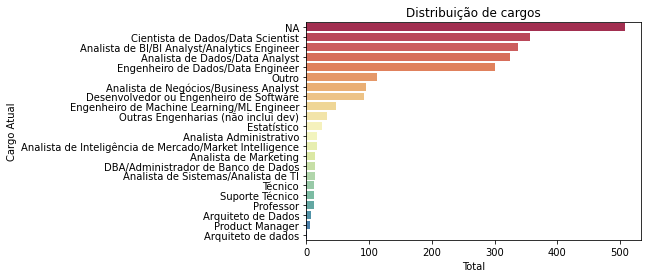

In [ ]:
sns.countplot(y='Cargo Atual', data=df, palette="Spectral", order=df['Cargo Atual'].value_counts().index) \
.set_title("Distribuição de cargos")
plt.xlabel('Total')


**Vamos agora analisar a distribuição de nível por gênero:**

# **TAREFA PARA CASA**
Analise a diferença de salario para gestão, olhar a coluna: "Cargo como Gestor(a)"
Analise a diferença por formação, olhar as colunas "Nivel Ensino" e "Area Formacao"

In [ ]:
df['Trabalha como Gestao'].value_counts()

0.0    1857
1.0     508
Name: Trabalha como Gestao, dtype: int64

In [ ]:
df1 = df[df['Genero'].str.contains('Masculino', na=False)]

In [ ]:
tmp = df1.groupby(['Trabalha como Gestao'])['Faixa Salarial_number'].mean()

In [ ]:
tmp.head()

Trabalha como Gestao
0.0     9361.429535
1.0    17072.562358
Name: Faixa Salarial_number, dtype: float64

In [ ]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Trabalha como Gestao,Salario Medio
0,0.0,9361.429535
1,1.0,17072.562358


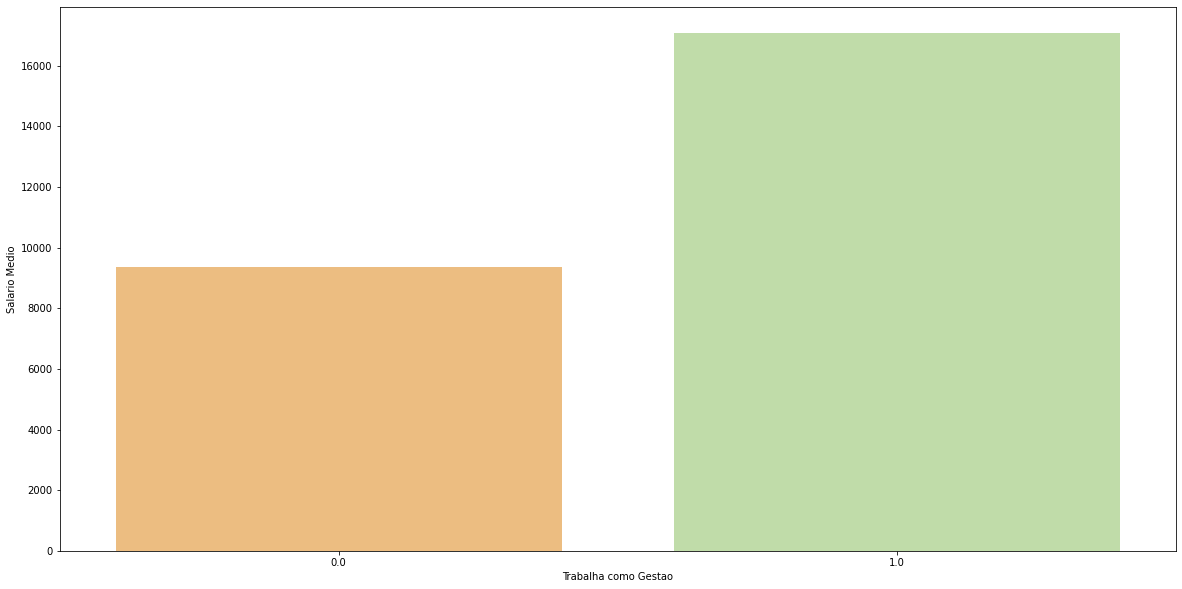

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Trabalha como Gestao', y='Salario Medio', data=tmp, palette='Spectral')


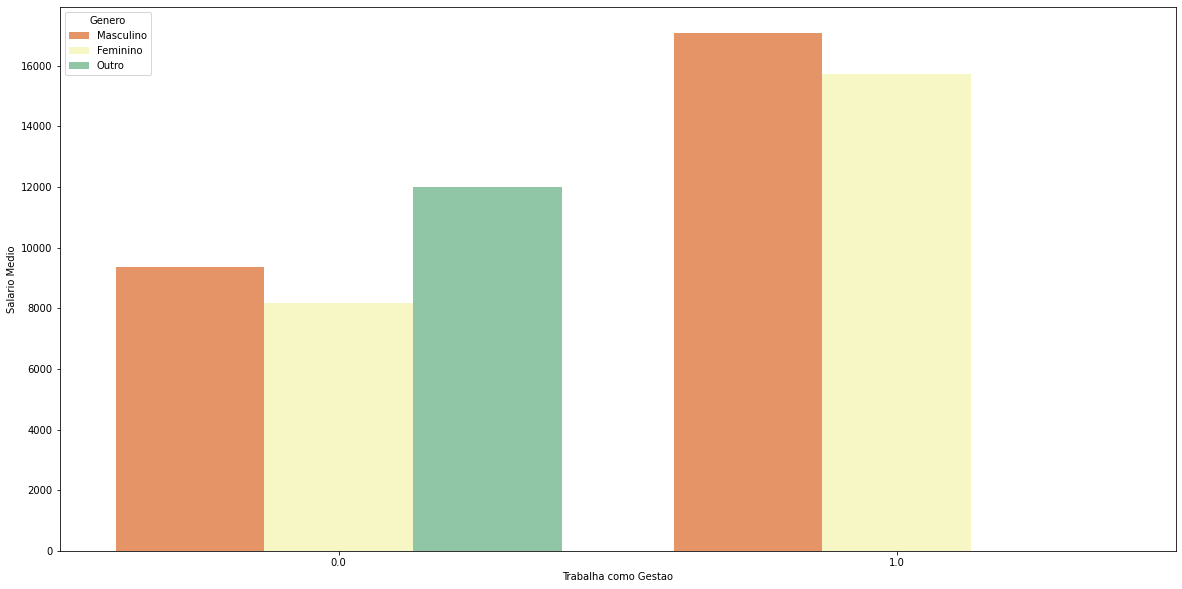

In [ ]:
tmp = df.groupby(['Genero', 'Trabalha como Gestao'])['Faixa Salarial_number'].mean()
tmp = tmp.reset_index(name='Salario Medio')
plt.figure(figsize=(20,10))
sns.barplot(x='Trabalha como Gestao', y='Salario Medio', hue='Genero', data=tmp, hue_order=['Masculino', 'Feminino', 'Outro'], palette='Spectral')

In [ ]:
# Verificando quais os niveis de ensino
df['Nivel Ensino'].value_counts()

Graduação/Bacharelado         830
Pós-graduação                 778
Mestrado                      307
Estudante de Graduação        299
Doutorado ou Phd               97
Não tenho graduação formal     51
Prefiro não informar            3
Name: Nivel Ensino, dtype: int64

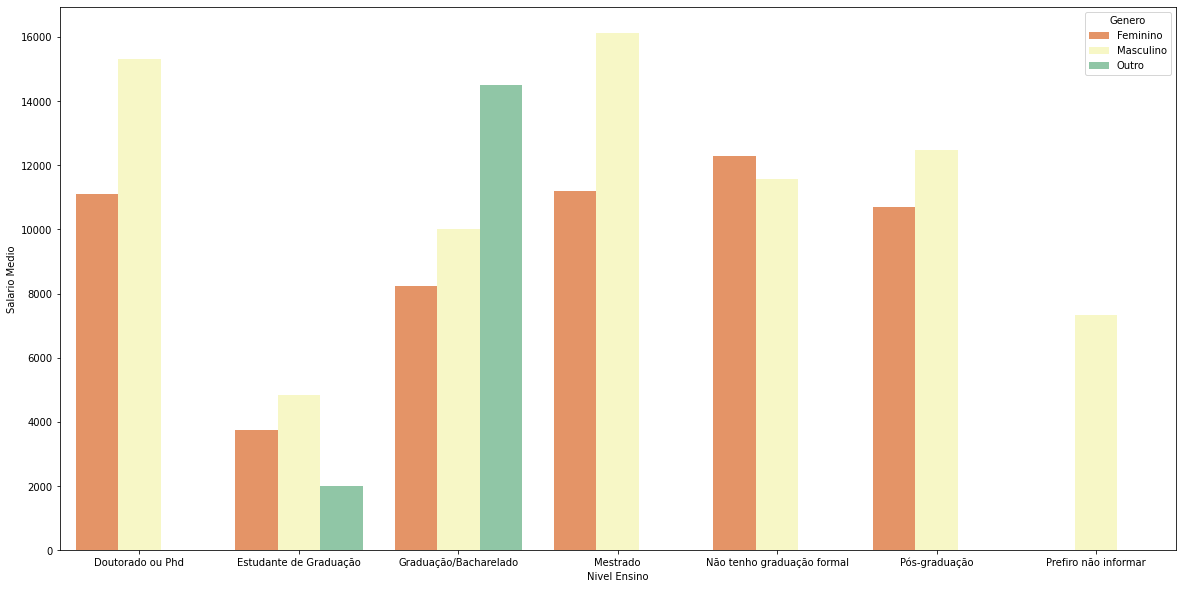

In [ ]:
## plotando o gráfico 
tmp = df.groupby(['Genero', 'Nivel Ensino'])['Faixa Salarial_number'].mean()
tmp = tmp.reset_index(name='Salario Medio')
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel Ensino', y='Salario Medio', hue='Genero', data=tmp, hue_order=['Feminino', 'Masculino', 'Outro'], palette='Spectral')